<a href="https://colab.research.google.com/github/no-way02/WIDS-SENTIMENT-ANALYSIS/blob/main/Week_1_TWITTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEEK 1

##Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#reading file from drive
df = pd.read_csv('/content/drive/MyDrive/btech/ML_DS/SentimentAnalysisDataset2.csv', error_bad_lines=False)

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [ ]:
#top 5 rows
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [ ]:
#NUll values in each row
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [ ]:
#droping columns SentimentSource and ItemID

df.drop(['SentimentSource','ItemID'],axis='columns', inplace=True)

df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!
1578608,1,"Zzzzzzz, sleep well people"
1578609,0,ZzzZzZzzzZ... wait no I have homework.
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
#ezpanding the tezt
pd.set_option('display.max_colwidth', -1)

df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


(1578612, 2)

In [ ]:
df = df[:20000]
df.shape

(20000, 2)

In [ ]:
#punctuation library
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#function to rempove punctuation
def remove_punctuation(tezt):
  punctuationfree="".join([i for i in tezt if i not in string.punctuation])
  return punctuationfree

In [ ]:
#column for clean tezt

df['clean_tweet'] = df['SentimentText'].apply(lambda z:remove_punctuation(z))
df.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sentiment,SentimentText,clean_tweet
0,0,is so sad for my APL friend.............,is so sad for my APL friend
1,0,I missed the New Moon trailer...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since 11 I was suposed 2 just get a crown put on 30mins
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT
5,0,or i just worry too much?,or i just worry too much
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin
7,0,Sunny Again Work Tomorrow :-| TV Tonight,Sunny Again Work Tomorrow TV Tonight
8,1,handed in my uniform today . i miss you already,handed in my uniform today i miss you already
9,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number


In [ ]:
#removing urls

def remove_urls(dataframe):
#replace URL of a text
    dataframe['clean_tweet'] = dataframe['clean_tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

remove_urls(df)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Sentiment,SentimentText,clean_tweet
0,0,is so sad for my APL friend.............,is so sad for my APL friend
1,0,I missed the New Moon trailer...,I missed the New Moon trailer
2,1,omg its already 7:30 :O,omg its already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,Omgaga Im sooo im gunna CRy Ive been at this dentist since 11 I was suposed 2 just get a crown put on 30mins
4,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT


In [ ]:
#removing stop words using nltk library

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#function to remove stopwords
def remove_stopwords(tezt):
  output=' '.join([word for word in tezt.split() if word not in (stopwords)])
  return output

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda z:remove_stopwords(z))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#performing lower casing
df['clean_tweet'] = df['clean_tweet'].apply(lambda z: z.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet
0,0,is so sad for my APL friend.............,sad apl friend
1,0,I missed the New Moon trailer...,i missed new moon trailer
2,1,omg its already 7:30 :O,omg already 730 o
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#function to perform tokenization

import re
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

df['token_tweet'] = df['clean_tweet'].apply(lambda z: tokenization(z))

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sentiment,SentimentText,clean_tweet,token_tweet
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]"
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]"
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]"


In [ ]:
#importing the stemming function from nltk library

from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

#definning function for stemming

def stemming(tezt):
  stem_tezt = [porter_stemmer.stem(word) for word in tezt]
  return stem_tezt

df['stem_tweet'] = df['token_tweet'].apply(lambda z:stemming(z))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# importing the lemmetizing function from nltk

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

#defining finction for lemmatization 

def lemmatizer(tezt):
  lemm_tezt = [wordnet_lemmatizer.lemmatize(word) for word in tezt]
  return lemm_tezt
  
df['lemm_tweet'] = df['token_tweet'].apply(lambda z:lemmatizer(z))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]"
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]"
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]"


##EDA

In [ ]:
#crating the word cloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df['l2s'] = df['lemm_tweet'].apply(lambda z:' '.join(map(str, z)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# def listToStr(tezt):
#   l2s_tezt = [' '.join(map(str, tezt)) for word in tezt]
#   return l2s_tezt

text = " ".join(tweet for tweet in (df['lemm_tweet'].apply(lambda z:' '.join(map(str, z)))))
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt


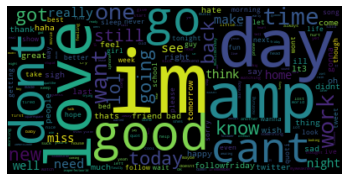

In [ ]:
# word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
plt.close()

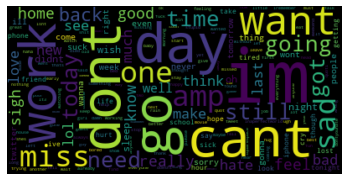

In [ ]:
# word cloud for negative sentiments
text = " ".join(tweet for tweet in (df['lemm_tweet'][df['Sentiment'] == 0].apply(lambda z:' '.join(map(str, z)))))
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

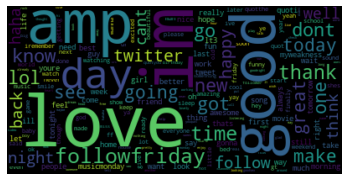

In [ ]:
# word cloud for positive sentiments

plt.close()
text = " ".join(tweet for tweet in (df['lemm_tweet'][df['Sentiment'] == 1].apply(lambda z:' '.join(map(str, z)))))
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)


plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt


In [ ]:
df['len'] = df['SentimentText'].str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Sentiment,SentimentText,clean_tweet,token_tweet,stem_tweet,lemm_tweet,l2s,len
0,0,is so sad for my APL friend.............,sad apl friend,"[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",sad apl friend,61
1,0,I missed the New Moon trailer...,i missed new moon trailer,"[i, missed, new, moon, trailer]","[i, miss, new, moon, trailer]","[i, missed, new, moon, trailer]",i missed new moon trailer,51
2,1,omg its already 7:30 :O,omg already 730 o,"[omg, already, 730, o]","[omg, alreadi, 730, o]","[omg, already, 730, o]",omg already 730 o,37
3,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...,omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,"[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]","[omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, 11, i, supos, 2, get, crown, put, 30min]","[omgaga, im, sooo, im, gunna, cry, ive, dentist, since, 11, i, suposed, 2, get, crown, put, 30mins]",omgaga im sooo im gunna cry ive dentist since 11 i suposed 2 get crown put 30mins,132
4,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating tt,"[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",think mi bf cheating tt,53


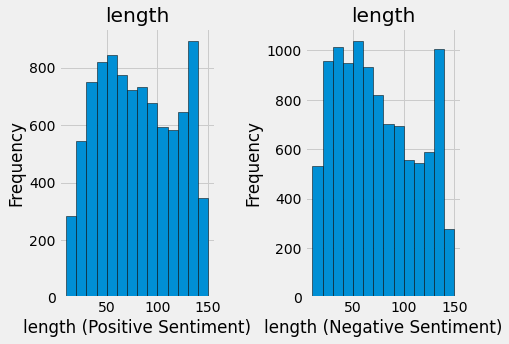

In [ ]:
#tweet length

plt.style.use('fivethirtyeight')

plt.figure(figsize=(7,5))

plt.subplot(1,2,1)

length = df['len'][df['Sentiment'] == 1]

bins= [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

plt.hist(length, bins=bins, edgecolor='black')

plt.title('length')
plt.xlabel('length (Positive Sentiment)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)

length = df['len'][df['Sentiment'] == 0]

bins= [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

plt.hist(length, bins=bins, edgecolor='black')

plt.title('length')
plt.xlabel('length (Negative Sentiment)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


Text(0.5, 1.0, 'Count distribution of Sentiment')

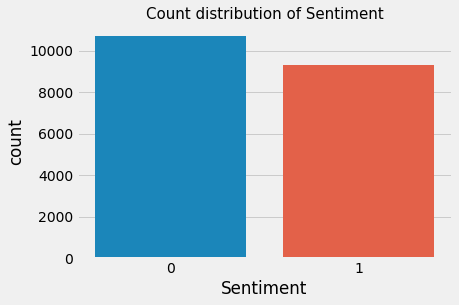

In [ ]:
# count plot using seaborn
sns.countplot(x="Sentiment", data=df)
plt.title("Count distribution of Sentiment", size=15)

In [ ]:
# positive tweet examples


df['SentimentText'][df['Sentiment'] == 1].head()

2                   omg its already 7:30 :O                        
6            Juuuuuuuuuuuuuuuuussssst Chillin!!                    
8           handed in my uniform today . i miss you already        
9           hmmmm.... i wonder how she my number @-)               
11          thanks to all the haters up in my face all day! 112-102
Name: SentimentText, dtype: object

In [ ]:
# negative tweet examples

df['SentimentText'][df['Sentiment'] == 0].head()

0                         is so sad for my APL friend.............                                                                       
1                       I missed the New Moon trailer...                                                                                 
3              .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...
4             i think mi bf is cheating on me!!!       T_T                                                                               
5             or i just worry too much?                                                                                                  
Name: SentimentText, dtype: object

In [ ]:
# longest positive tweet

df.iloc[df['len'][df['Sentiment'] == 1].idxmax()]

Sentiment        1                                                                                                                                                                                                                                                                                       
SentimentText    #self_info 2ë‹¬ë?œ ê°œë°œìž?... ì?¸ê°„ì ?ì?¸ ê°œë°œìž?ë¥¼ ê¿ˆê¿‰ë‹ˆë‹¤. í˜„ìž¬ ì§€ì—­ê´‘ê³ ì„œë²„ë¥¼ í•˜ê³ , ê°œì?¸ì ?ìœ¼ë¡œëŠ” ê²€ìƒ‰ì—”ì§„ì?„ ë§Œë“¤ë ¤ê³  ì¤€ë¹„ì¤‘ìž…ë‹ˆë‹¤. ì¤€ë¹„. . .ã…‹ã…‹ã…‹ íŒ”ë¡œìš° ê³ ê³ ê³ ~   ê¸°ìˆ ìœ„ì—? ì‚¬ëžŒìžˆì§€ ì‚¬ëžŒìœ„ì—? ê¸°ìˆ ì—†ë‹¤~!      
clean_tweet      selfinfo 2ë‹¬ëœ ê°œë°œìž ì¸ê°„ì ì¸ ê°œë°œìžë¥¼ ê¿ˆê¿‰ë‹ˆë‹¤ í˜„ìž¬ ì§€ì—­ê´‘ê³ ì„œë²„ë¥¼ í•˜ê³ ê°œì¸ì ìœ¼ë¡œëš” ê²€ìƒ‰ì—”ì§„ì„ ë§œë“¤ë ¤ê³ ì¤€ë¹„ì¤‘ìž…ë‹ˆë‹¤ ì¤€ë¹„ ã…‹ã…‹ã…‹ íœ”ë¡œìš° ê³ ê³ ê³ ê¸°ìˆ ìœ„ì— ì‚¬ëžœìžˆì§€ ì‚¬ëžœìœ„ì— ê¸°ìˆ ì—†ë‹¤                                     
token_tweet      [selfinfo, 2ë, ëœ, ê, œë, œìž, ì, ê, ì, ì, ê, œë, œìžë, ¼, ê, ˆê, ë, ˆë, í, ìž, ì, ì, ê, 

In [ ]:
# longest negative tweet
df.iloc[df['len'][df['Sentiment'] == 0].idxmax()]

Sentiment        0                                                                                                                                                                                                                                                                                              
SentimentText    &quot;Ð¯ Ð¿Ð¾Ð´Ð¿Ð¸Ñ?Ð°Ð»Ñ?Ñ? Ð½Ð° Ð²Ð°ÑˆÑƒ RSS Ð»ÐµÐ½Ñ‚Ñƒ, Ð½Ð¾ Ñ?Ð¾Ð¾Ð±Ñ‰ÐµÐ½Ð¸Ñ? Ð¿Ð¾Ñ‡ÐµÐ¼Ñƒ-Ñ‚Ð¾ Ð² Ð²Ð¸Ð´Ðµ ÐºÐ°ÐºÐ¸Ñ…-Ñ‚Ð¾ ÐºÐ²Ð°Ð´Ñ€Ð°Ñ‚Ð¾Ð²  ÐšÐ°Ðº Ñ?Ñ‚Ð¾ Ð¸Ñ?Ð¿Ñ€Ð°Ð²Ð¸Ñ‚ÑŒ?&quot; ÐŸÐ¾Ð¹Ñ‚Ð¸ Ð½Ð°Ñ… Ð¸ Ð·Ð°Ð±Ñ‹Ñ‚ÑŒ Ð¿Ñ€Ð¾ Ð¼Ð¾ÑŽ RSS ))                                           
clean_tweet      quotð¯ ð¿ð¾ð´ð¿ð¸ñð°ð»ññ ð½ð° ð²ð°ñˆñƒ rss ð»ðµð½ñ‚ñƒ ð½ð¾ ñð¾ð¾ð±ñ‰ðµð½ð¸ñ ð¿ð¾ñ‡ðµð¼ñƒñ‚ð¾ ð² ð²ð¸ð´ðµ ðºð°ðºð¸ñ…ñ‚ð¾ ðºð²ð°ð´ñ€ð°ñ‚ð¾ð² ðšð°ðº ññ‚ð¾ ð¸ñð¿ñ€ð°ð²ð¸ñ‚ñœquot ðÿð¾ð¹ñ‚ð¸ ð½ð°ñ… ð¸ ð·ð°ð±ñ‹ñ‚ñœ ð¿ñ€ð¾ ð¼ð¾ñž rss                                                              
token_tweet      [quotð, ð, ð¾ð, ð, ð, ñð, ð, ññ, ð½ð, ð²ð, ñˆñƒ, rss, ð, ðµð½ñ, ñƒ, 